In [1]:
# Change the working directory to the parent directory so imports and everything else works
import os
os.chdir("..")

Visualize trajectories from the pose files. Same implementation (with small modifications) as the function from the `debug.ipynb` from our MonoRec repository.

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_trajectory(x, y, z, orientations, every_nth=50):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot trajectory
    ax.plot(x, y, z, 'k-', label='Trajectory', linewidth=2.0)

    # Set maximum and minimum values for all axes to be the maximum absolute
    # value
    x_abs = [abs(num) for num in x]
    y_abs = [abs(num) for num in y]
    z_abs = [abs(num) for num in z]

    max_value = max(max(x_abs), max(y_abs), max(z_abs))
    min_value = -max_value

    ax.set_xlim([min_value, max_value])
    ax.set_ylim([min_value, max_value])
    ax.set_zlim([min_value, max_value])

    # Scale factor for the coordinate frame axes
    coordinate_scale = max_value * 0.1

    # Plot camera orientations
    for i in range(len(x)):
        R = orientations[i]
        origin = np.array([x[i], y[i], z[i]])
        x_axis = R @ (coordinate_scale * np.array([1,0,0]).reshape(3,1))
        y_axis = R @ (coordinate_scale * np.array([0,1,0]).reshape(3,1))
        z_axis = R @ (coordinate_scale * np.array([0,0,1]).reshape(3,1))

        if i == 0:
            # Plot the camera center
            ax.scatter(x[i], y[i], z[i], color='k')
            ax.quiver(origin[0], origin[1], origin[2], x_axis[0], x_axis[1], x_axis[2], color='r', label='Camera X-axis', arrow_length_ratio=0.1)
            ax.quiver(origin[0], origin[1], origin[2], y_axis[0], y_axis[1], y_axis[2], color='g', label='Camera Y-axis', arrow_length_ratio=0.1)
            ax.quiver(origin[0], origin[1], origin[2], z_axis[0], z_axis[1], z_axis[2], color='b', label='Camera Z-axis', arrow_length_ratio=0.1)
        elif i % every_nth == 0:
            # Plot the camera center
            ax.scatter(x[i], y[i], z[i], color='k')
            ax.quiver(origin[0], origin[1], origin[2], x_axis[0], x_axis[1], x_axis[2], color='r', arrow_length_ratio=0.1)
            ax.quiver(origin[0], origin[1], origin[2], y_axis[0], y_axis[1], y_axis[2], color='g', arrow_length_ratio=0.1)
            ax.quiver(origin[0], origin[1], origin[2], z_axis[0], z_axis[1], z_axis[2], color='b', arrow_length_ratio=0.1)


    # Axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y (up/down)')
    ax.set_zlabel('Z (forward)')

    ax.legend()

    plt.show()

In [5]:
from mono.utils.trajectory import read_kitti_trajectory
# trajectory_path = "/usr/stud/kaa/thesis/MonoRec/example/data/kitti/poses/07.txt"
trajectory_path = "/usr/stud/kaa/thesis/data_temp/deep_scenario/poses_dvso/01.txt"

trajectories = read_kitti_trajectory(trajectory_path) # returns a list of [4,4] np.ndarrays

x = []
y = []
z = []
R = []


for element in trajectories:
    # Currently read-in coordinates x,y,z and rotation matrix R_w_cam0
    x_curr, y_curr, z_curr = element[:3, 3]
    R_curr = element[:3,:3]

    x.append(x_curr)
    y.append(y_curr)
    z.append(z_curr)
    R.append(R_curr)

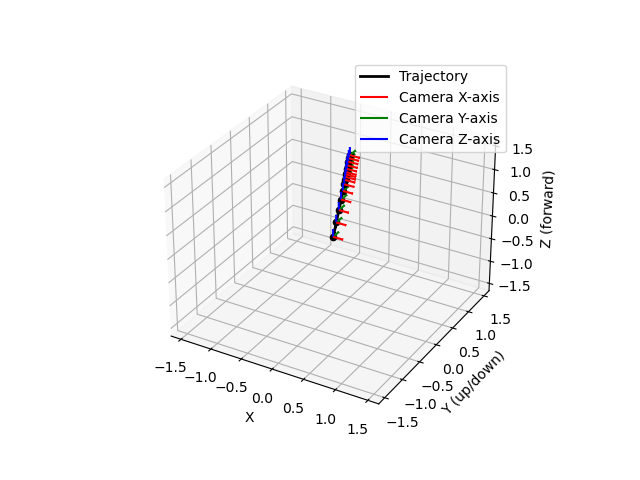

In [6]:
FANCY_PLOT = True

if FANCY_PLOT:
    visualize_trajectory(x,y,z,R)
else:
    # Create a new figure and add a 3D subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trajectory
    ax.plot(x, y, z)

    # Set maximum and minimum values for all axes to be the maximum absolute
    # value
    x_abs = [abs(num) for num in x]
    y_abs = [abs(num) for num in y]
    z_abs = [abs(num) for num in z]

    max_value = max(max(x_abs), max(y_abs), max(z_abs))
    min_value = -max_value

    ax.set_xlim([min_value, max_value])
    ax.set_ylim([min_value, max_value])
    ax.set_zlim([min_value, max_value])

    # Display the plot
    plt.show()